In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.testing as tm
sns.set_style('whitegrid')

In [3]:
advert = pd.read_csv('data_advertising.csv')

In [4]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
advert.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [6]:
advert.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


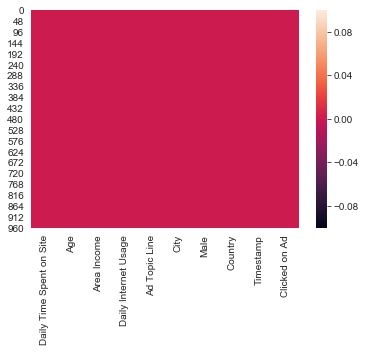

In [7]:
sns.heatmap(advert.isnull(),cbar= True)

(array([12.,  6., 13., 19., 21., 27., 37., 33., 48., 48., 39., 60., 38.,
        43., 39., 39., 50., 36., 37., 30., 68., 26., 23., 21., 30., 18.,
        13., 16., 18., 20., 12., 15., 10.,  9.,  7.,  2.,  6.,  4.,  2.,
         5.]),
 array([19.  , 20.05, 21.1 , 22.15, 23.2 , 24.25, 25.3 , 26.35, 27.4 ,
        28.45, 29.5 , 30.55, 31.6 , 32.65, 33.7 , 34.75, 35.8 , 36.85,
        37.9 , 38.95, 40.  , 41.05, 42.1 , 43.15, 44.2 , 45.25, 46.3 ,
        47.35, 48.4 , 49.45, 50.5 , 51.55, 52.6 , 53.65, 54.7 , 55.75,
        56.8 , 57.85, 58.9 , 59.95, 61.  ]),
 <a list of 40 Patch objects>)

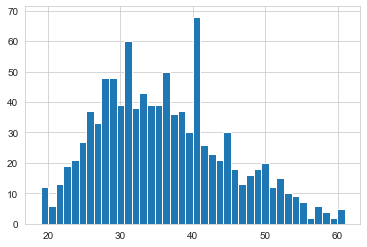

In [8]:
plt.hist(x='Age',data=advert,bins = 40)

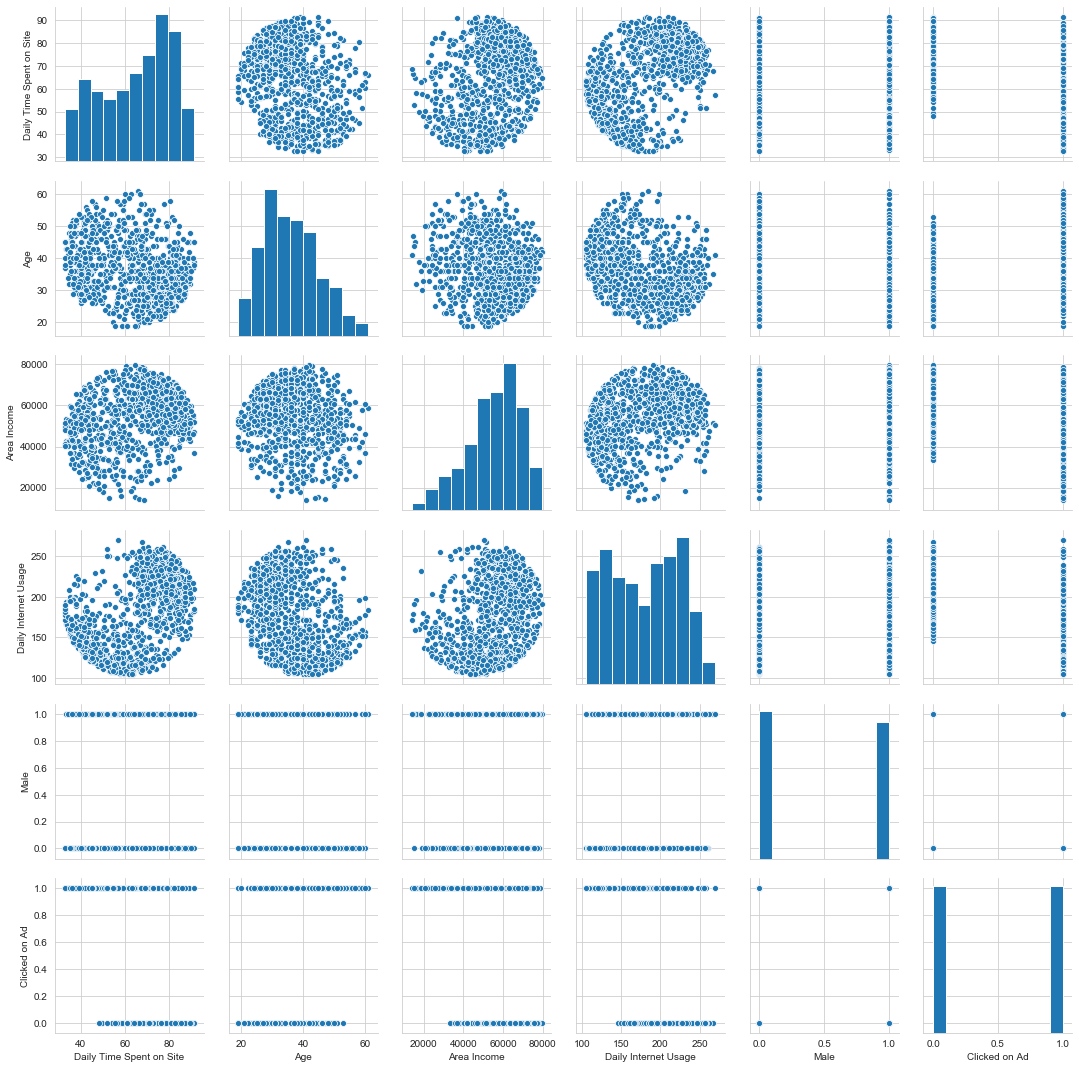

In [9]:
sns.pairplot(data=advert)

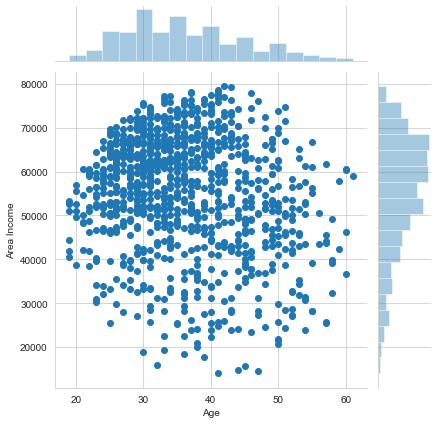

In [10]:
sns.jointplot(x = 'Age',y = 'Area Income',data = advert)

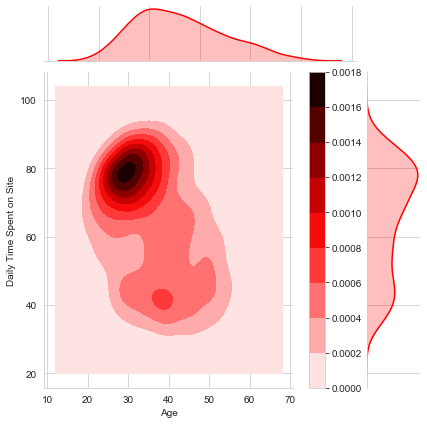

In [11]:
sns.jointplot(x = 'Age',y = 'Daily Time Spent on Site',data = advert,kind = 'kde',color = 'red',cbar=True)

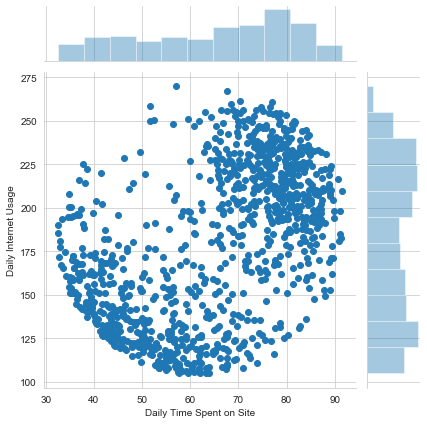

In [12]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=advert)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


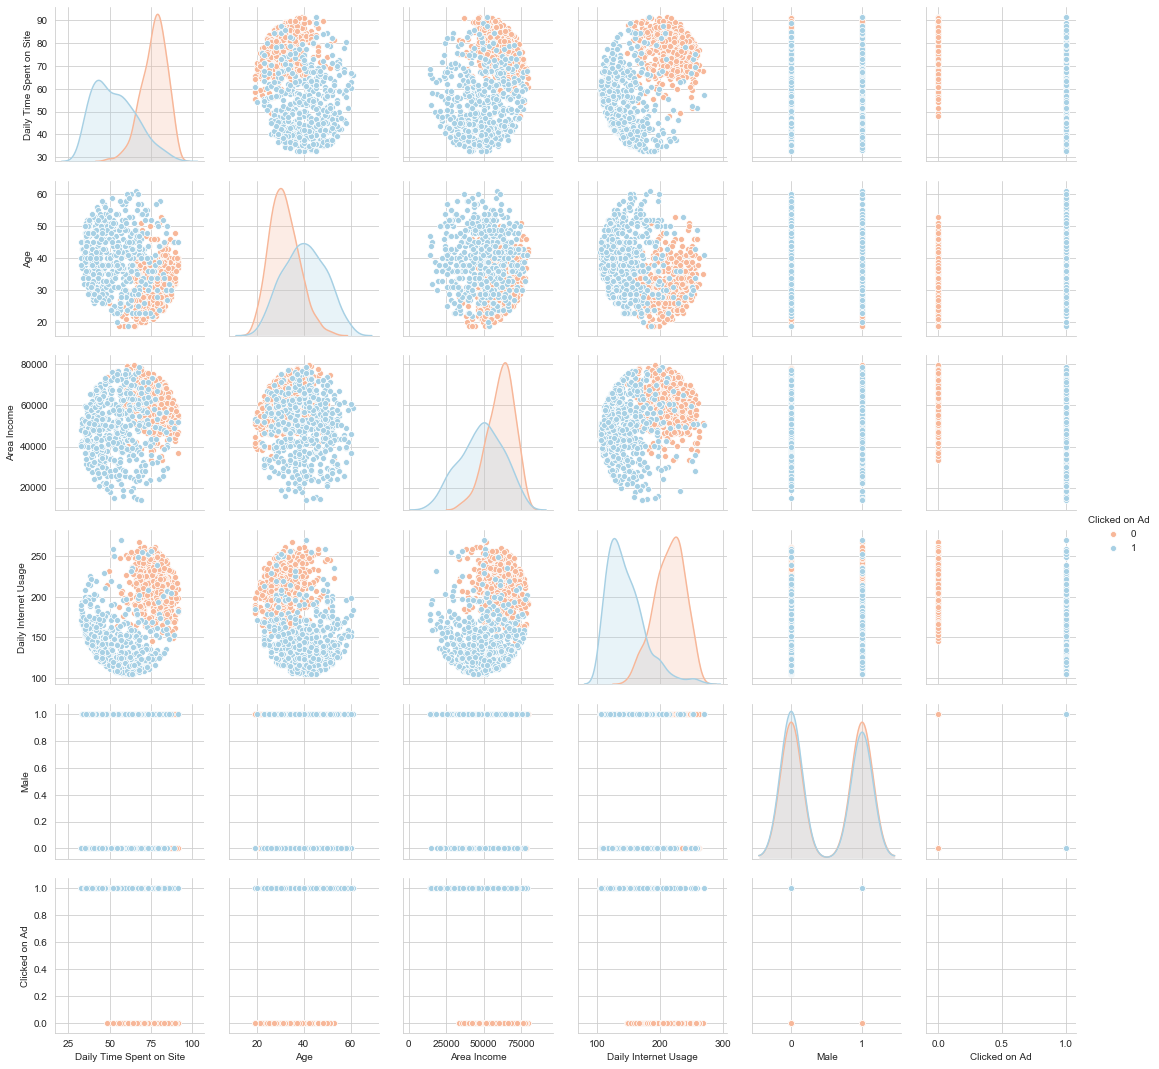

In [13]:
fig = sns.pairplot(data = advert,hue = 'Clicked on Ad',palette = 'RdBu')


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
advert.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [16]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [17]:
X = advert.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'],axis = 1)
y = advert['Clicked on Ad']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 101)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logm =  LogisticRegression()

In [21]:
logm.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [22]:
predictions = logm.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[149   8]
 [ 15 128]]


In [ ]:
error_list = []
for i in range(1,40):
    